In [25]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [43]:
# All paths to .csv files
path1 = "../original_data/marwis_data_2023-12.csv"
path2 = "../original_data/marwis_data_2024-01.csv"
path3 = "../original_data/marwis_data_2024-02.csv"


In [27]:
def unpack_json(path):
    #json column name
    json_column = 'data'
    # columns to exclude
    columns = ["id", "device_id", json_column, "alt", "hdg", "lat", "lon",
               "pwr", "spd", "tienimi", "tieosoite", "timeStamp"]
    # Load the CSV file
    df = pd.read_csv(path)

    # Expand the JSON column into separate columns
    json_expanded = df[json_column].apply(json.loads).apply(pd.Series)
    # Concatenate the expanded JSON columns with the original dataframe
    df = pd.concat([df, json_expanded], axis=1)
    # Delete columns
    df.drop(columns, axis=1, inplace=True)

    # Display the updated dataframe
    return df

In [44]:
# Apply the unpacking function to every file 
marwis2023_12 = unpack_json(path1)
marwis2024_01 = unpack_json(path2)
marwis2024_02 = unpack_json(path3)

# Combine all datasets to one
df = pd.concat([marwis2023_12, marwis2024_01, marwis2024_02])


/var/folders/19/0ldx1bc54jx5tvjkrsbcv4040000gn/T/ipykernel_37669/4281715045.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [ ]:
# Delete duplcicated timestamps
df.drop_duplicates(subset="timestamp", inplace=True)

In [45]:
df.to_csv("../ready_data/merged_marwis.csv")

<h1>END OF MERGING</H1>

In [ ]:
df = pd.read_csv("../ready_data/merged_marwis.csv")

In [ ]:

# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the DataFrame by timestamp to ensure proper order (if not already sorted)
df = df.sort_values('timestamp')

# Calculate the time difference between each row
df['time_diff'] = df['timestamp'].diff()

# Check for rows where the time difference is greater than the expected interval
# For example, more than 1 second if data is supposed to be at 1-second intervals
gap_threshold = pd.Timedelta(minutes=5)
gaps = df[df['time_diff'] > gap_threshold]
print_gaps = gaps[['timestamp', 'time_diff']]
# Display gaps with their time differences
print("Gaps in Time Series Data:")
print_gaps

Gaps in Time Series Data:


,timestamp,time_diff
50452,2023-12-02 08:09:45+02:00,0 days 11:56:24
111417,2023-12-04 05:32:03+02:00,1 days 04:17:53
169001,2023-12-04 21:35:38+02:00,0 days 01:41:45
169883,2023-12-05 05:37:46+02:00,0 days 07:47:19
226741,2023-12-06 08:07:45+02:00,0 days 12:13:53
...,...,...
675599,2024-02-27 05:37:21+02:00,0 days 11:00:02
722350,2024-02-28 05:15:15+02:00,0 days 10:35:14
770093,2024-02-28 23:38:27+02:00,0 days 05:02:55
771314,2024-02-29 12:43:57+02:00,0 days 12:46:00


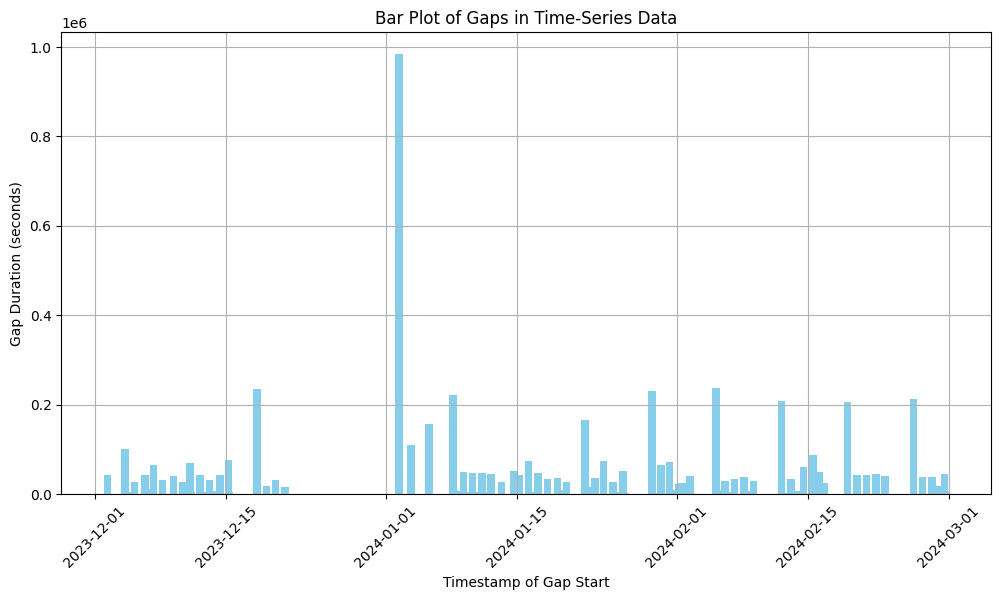

In [53]:
# Create a bar plot for the gaps
plt.figure(figsize=(12, 6))
plt.bar(gaps['timestamp'], gaps['time_diff'].dt.total_seconds(), color='skyblue')

# Label the axes and title
plt.xlabel('Timestamp of Gap Start')
plt.ylabel('Gap Duration (seconds)')
plt.title('Bar Plot of Gaps in Time-Series Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()